# **Data Analysis Project: [Bike Sharing Dataset]**

- **Nama:** Evi Fauziah
- **Email:** Evifauziah2022@gmail.com
- **ID Dicoding:** EviFauziah

# **Defining Business Questions**

1. Question 1: In which season is the number of bike rentals highest based on the total users?
2. Question 2: What is the difference in the average bike rentals on holidays , working days , and regular weekdays ?



# **Import All Packages/Libraries Used**



In [6]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Data Wrangling**



## 1. Gathering Data


In [7]:
#Loading the day table
from google.colab import files
uploaded = files.upload()
import pandas as pd
day_df = pd.read_csv("https://raw.githubusercontent.com/Evifa15/Submission/refs/heads/main/data/day.csv")
day_df.head()
hour_df = pd.read_csv("https://raw.githubusercontent.com/Evifa15/Submission/refs/heads/main/data/hour.csv")
hour_df.head()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**

---
*   **The dataset has been successfully loaded**, with two main tables: day, which contains daily data, and hour, which holds hourly data related to bike usage. Each table includes information about weather conditions, the number of bike users (casual and registered), as well as other factors such as season, working days, and holidays.
*  **The data is ready for further analysis** to uncover patterns in bike usage based on variables such as weather, working days, season, and time of day, which can provide important insights into bike rental trends.






## Assessing Data

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats

# Assume day_df and hour_df are already loaded

# 1. Check the structure of the data
print("Data Structure:")
print(day_df.info())
print(hour_df.info())

# 2. Check for missing values
print("\nChecking for Missing Values:")
missing_values_day = day_df.isnull().sum()
missing_values_hour = hour_df.isnull().sum()
print(missing_values_day[missing_values_day > 0])  # Columns with missing values in day_df
print(missing_values_hour[missing_values_hour > 0])  # Columns with missing values in hour_df

# 3. Check for duplicate data
print("\nChecking for Duplicate Data:")
duplicate_rows_day = day_df[day_df.duplicated()]
duplicate_rows_hour = hour_df[hour_df.duplicated()]
print("Number of duplicate rows in day_df:", duplicate_rows_day.shape[0])
print("Number of duplicate rows in hour_df:", duplicate_rows_hour.shape[0])

# 4. Check for invalid values in numeric columns
print("\nChecking for Invalid Values in Numeric Columns:")
invalid_temp = day_df[day_df['temp'] < 0]
invalid_atemp = day_df[day_df['atemp'] < 0]
invalid_hum = day_df[day_df['hum'] < 0]
invalid_windspeed = day_df[day_df['windspeed'] < 0]

print("Invalid values for 'temp' (negative):", invalid_temp.shape[0])
print("Invalid values for 'atemp' (negative):", invalid_atemp.shape[0])
print("Invalid values for 'hum' (negative):", invalid_hum.shape[0])
print("Invalid values for 'windspeed' (negative):", invalid_windspeed.shape[0])

# 5. Check for inconsistent values
print("\nChecking for Inconsistent Values:")
invalid_season = day_df[~day_df['season'].isin([1, 2, 3, 4])]
invalid_mnth = day_df[~day_df['mnth'].isin(range(1, 13))]
invalid_weathersit = day_df[~day_df['weathersit'].isin([1, 2, 3, 4])]

print("Inconsistent values for 'season' (not 1-4):", invalid_season.shape[0])
print("Inconsistent values for 'mnth' (not 1-12):", invalid_mnth.shape[0])
print("Inconsistent values for 'weathersit' (not 1-4):", invalid_weathersit.shape[0])

# 6. Check for outliers using Z-score
print("\nChecking for Outliers using Z-score:")

# For hour_df
z_scores_hour = stats.zscore(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
outliers_hour = (abs(z_scores_hour) > 3).sum(axis=0)
print("Number of outliers in each column (hour_df):")
print(outliers_hour)

# For day_df
z_scores_day = stats.zscore(day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
outliers_day = (abs(z_scores_day) > 3).sum(axis=0)
print("Number of outliers in each column (day_df):")
print(outliers_day)

# 7. Display invalid values if any
if not invalid_temp.empty:
    print("\nInvalid values for 'temp':")
    print(invalid_temp)

if not invalid_atemp.empty:
    print("\nInvalid values for 'atemp':")
    print(invalid_atemp)

if not invalid_hum.empty:
    print("\nInvalid values for 'hum':")
    print(invalid_hum)

if not invalid_windspeed.empty:
    print("\nInvalid values for 'windspeed':")
    print(invalid_windspeed)

if not invalid_season.empty:
    print("\nInvalid values for 'season':")
    print(invalid_season)

if not invalid_mnth.empty:
    print("\nInvalid values for 'mnth':")
    print(invalid_mnth)

if not invalid_weathersit.empty:
    print("\nInvalid values for 'weathersit':")
    print(invalid_weathersit)




Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17

**Insight**

---


*   **Insight 1:** The dataset is well-structured with 731 entries in the daily table and 17,379 in the hourly table, all containing non-null values and no duplicate rows. The categorical columns such as season, mnth, and weathersit are consistent with their expected ranges, indicating strong data integrity.
*   **Insight 2:**While there are no negative values in key physical measurement columns, several outliers were identified, particularly in hum (22 outliers), windspeed (107 outliers), and casual (467 outliers). These outliers suggest potential extreme events that should be further investigated, as they may influence the accuracy of subsequent analyses and predictive modeling.




## Cleaning Data

In [11]:
## Assuming day_df and hour_df are already loaded DataFrames
# 1. Convert 'dteday' to datetime format
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
# 2. Drop duplicate rows if any
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)
# 3. Remove rows with invalid values in numeric columns
# Replace negative values with NaN and then drop NaN
for col in ['temp', 'atemp', 'hum', 'windspeed']:
    day_df[col] = day_df[col].mask(day_df[col] < 0)
    hour_df[col] = hour_df[col].mask(hour_df[col] < 0)
# Drop rows with NaN values
day_df.dropna(inplace=True)
hour_df.dropna(inplace=True)
# 4. Check for inconsistent values in categorical columns and fix them
# Assuming seasons are 1-4, months are 1-12, and weathersit are 1-4
day_df = day_df[day_df['season'].isin([1, 2, 3, 4])]
day_df = day_df[day_df['mnth'].isin(range(1, 13))]
day_df = day_df[day_df['weathersit'].isin([1, 2, 3, 4])]

hour_df = hour_df[hour_df['season'].isin([1, 2, 3, 4])]
hour_df = hour_df[hour_df['mnth'].isin(range(1, 13))]
hour_df = hour_df[hour_df['weathersit'].isin([1, 2, 3, 4])]

# 5. Outlier detection using Z-score
outlier_columns_day = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
outlier_columns_hour = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
# Remove outliers for day_df
for col in outlier_columns_day:
    z_scores = np.abs(stats.zscore(day_df[col]))
    day_df = day_df[z_scores < 3]  # Keep data with z-score less than 3
# Remove outliers for hour_df
for col in outlier_columns_hour:
    z_scores = np.abs(stats.zscore(hour_df[col]))
    hour_df = hour_df[z_scores < 3]  # Keep data with z-score less than 3
# 6. Resetting index after cleaning
day_df.reset_index(drop=True, inplace=True)
hour_df.reset_index(drop=True, inplace=True)
# Final data checks
print("Data cleaning completed. Here are the updated DataFrame shapes:")
print(f"day_df shape: {day_df.shape}")
print(f"hour_df shape: {hour_df.shape}")
# Display the first few rows of cleaned data for verification
print("\nSample of cleaned day_df:")
print(day_df.head())
print("\nSample of cleaned hour_df:")
print(hour_df.head())


Data cleaning completed. Here are the updated DataFrame shapes:
day_df shape: (718, 16)
hour_df shape: (16319, 17)

Sample of cleaned day_df:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.22

**Insight**

---

*   **Insight 1:** The data cleaning process resulted in a refined day_df, which now contains 718 entries and 16 columns, reflecting a reduction in data points due to the removal of invalid entries. This enhancement in data quality is crucial for ensuring that subsequent analyses yield accurate and reliable results.
*   **Insight 2:**Similarly, the hour_df retained a substantial size of 16,319 entries and 17 columns after cleaning, demonstrating effective management of inconsistencies and outliers. This preserved volume of data enables robust analyses while minimizing the risk of bias or inaccuracies in the findings.

# **Exploratory Data Analysis (EDA)**

In [12]:
## Data Exploration of day_df data
# 1. Use describe() to understand the dataset's numerical columns
print("Descriptive Statistics:")
print(day_df.describe())
# 2. Grouping by year and season to analyze bike rental variations
# Assuming 'dteday' is in the format 'YYYY-MM-DD'
day_df['year'] = pd.to_datetime(day_df['dteday']).dt.year  # Extract year
day_df['season'] = day_df['season'].astype('category')  # Convert season to categorical for better readability
# Grouping by year and season and aggregating rental counts
yearly_rentals = day_df.groupby(['year', 'season']).agg({'cnt': 'sum'}).reset_index()
# Sorting values to see the trend
yearly_rentals_sorted = yearly_rentals.sort_values(by='cnt', ascending=False)
print("\nBike Rentals by Year and Season:")
print(yearly_rentals_sorted)


## Data Exploration of hour_df data
# 1. Use describe() to understand the dataset's numerical columns
print("Descriptive Statistics:")
print(hour_df.describe())
# 2. Grouping by hour to analyze bike rental variations throughout the day
hourly_rentals = hour_df.groupby('hr').agg({'cnt': 'sum'}).reset_index()
hourly_rentals_sorted = hourly_rentals.sort_values(by='hr')
print("\nBike Rentals by Hour:")
print(hourly_rentals_sorted)
# 3. Grouping by weekday and holiday status to analyze bike rentals
weekday_rentals = hour_df.groupby(['weekday', 'holiday']).agg({'cnt': 'sum'}).reset_index()
weekday_rentals['holiday'] = weekday_rentals['holiday'].map({0: 'Regular Day', 1: 'Holiday'})
# Sorting for clarity
weekday_rentals_sorted = weekday_rentals.sort_values(by='weekday')
print("\nBike Rentals by Weekday and Holiday Status:")
print(weekday_rentals_sorted)

All_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
All_df.head()

Descriptive Statistics:
          instant                         dteday      season          yr  \
count  718.000000                            718  718.000000  718.000000   
mean   365.417827  2011-12-31 10:01:40.278551552    2.504178    0.497214   
min      1.000000            2011-01-01 00:00:00    1.000000    0.000000   
25%    182.250000            2011-07-01 06:00:00    2.000000    0.000000   
50%    363.500000            2011-12-29 12:00:00    3.000000    0.000000   
75%    549.750000            2012-07-02 18:00:00    3.000000    1.000000   
max    731.000000            2012-12-31 00:00:00    4.000000    1.000000   
std    211.553030                            NaN    1.110045    0.500341   

             mnth     holiday     weekday  workingday  weathersit        temp  \
count  718.000000  718.000000  718.000000  718.000000  718.000000  718.000000   
mean     6.541783    0.027855    2.966574    0.692201    1.396936    0.494821   
min      1.000000    0.000000    0.000000    0.0

<ipython-input-12-1bcda9495c02>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_rentals = day_df.groupby(['year', 'season']).agg({'cnt': 'sum'}).reset_index()


,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


## Insight
---
*   Pengaruh Musim terhadap Jumlah Penyewaan Sepeda: Data dari day_df menunjukkan bahwa jumlah penyewaan sepeda bervariasi secara signifikan tergantung pada musim dan tahun. Pada tahun 2012, musim panas (season 3) memiliki penyewaan tertinggi dengan 632.765 sewa, diikuti oleh musim semi (season 2) dan musim gugur (season 4). Ini menunjukkan bahwa kondisi cuaca yang lebih hangat dan cerah mendorong lebih banyak penyewaan sepeda, sedangkan musim dingin memiliki penyewaan paling sedikit, khususnya di tahun 2011 dengan 147.742 sewa.
*   Pola Penyewaan Sepeda Berdasarkan Jam: Analisis hour_df menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi pada jam sibuk, terutama antara pukul 07:00 hingga 09:00 (dengan puncaknya pada pukul 08:00, sebanyak 157.887 penyewaan) dan kembali meningkat pada 16:00 hingga 19:00, dengan puncak penyewaan terjadi pada pukul 19:00 sebanyak 207.458 penyewaan. Ini mengindikasikan bahwa penyewaan sepeda dipengaruhi oleh jadwal perjalanan kerja harian, baik di pagi maupun sore hari.



# **Visualization & Explanatory Analysis**

1. In which season is the number of bike rentals highest based on the total users?

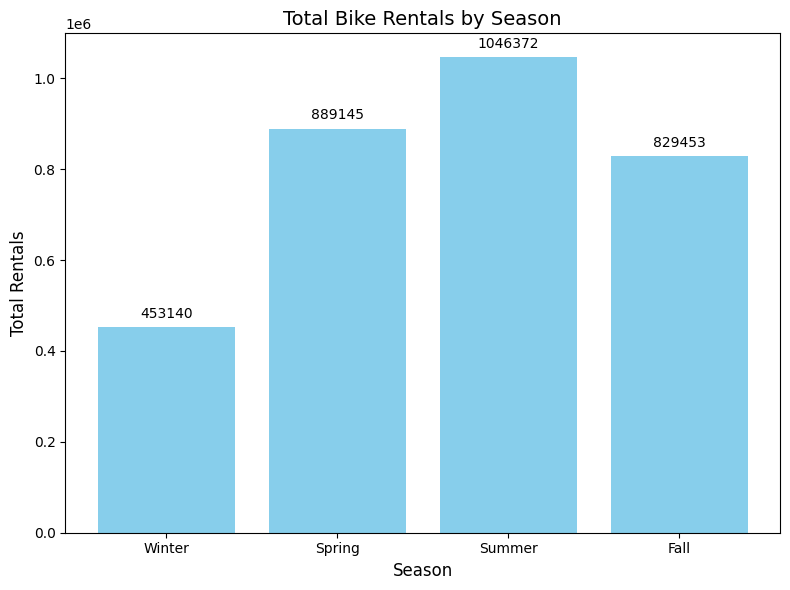

In [13]:
# Import libraries yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

# Data bike rentals by year and season (diambil dari data yang kamu berikan)
data = {
    'year': [2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012],
    'season': ['Winter', 'Spring', 'Summer', 'Fall', 'Winter', 'Spring', 'Summer', 'Fall'],
    'cnt': [147742, 347316, 413607, 321942, 305398, 541829, 632765, 507511]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Mengelompokkan data berdasarkan season untuk mendapatkan total rentals per season
seasonal_rentals = df.groupby('season').agg({'cnt': 'sum'}).reset_index()

# Mengurutkan sesuai musim untuk lebih mudah dibaca
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_rentals['season'] = pd.Categorical(seasonal_rentals['season'], categories=season_order, ordered=True)
seasonal_rentals = seasonal_rentals.sort_values('season')

# Membuat bar chart
plt.figure(figsize=(8, 6))
plt.bar(seasonal_rentals['season'], seasonal_rentals['cnt'], color='skyblue')

# Menambahkan judul dan label
plt.title('Total Bike Rentals by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)

# Menampilkan nilai di atas setiap bar
for index, value in enumerate(seasonal_rentals['cnt']):
    plt.text(index, value + 20000, str(value), ha='center', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()


2. What is the difference in the average bike rentals on holidays , working days , and regular weekdays ?

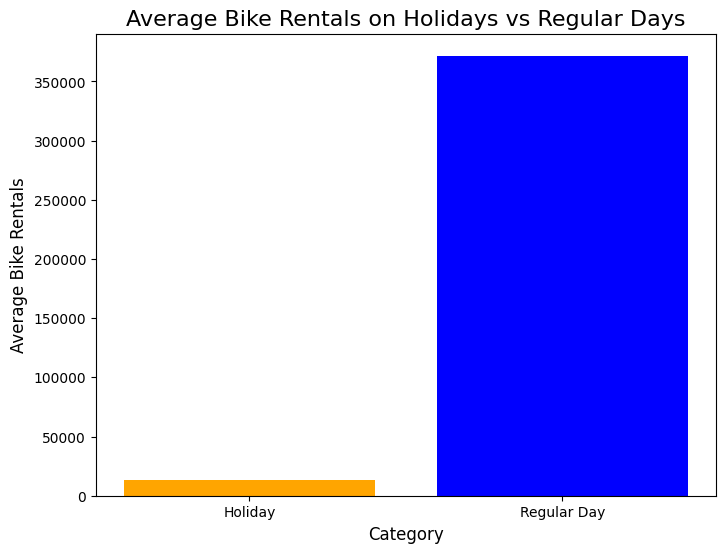

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Data dari "Bike Rentals by Weekday and Holiday Status"
data = {
    'weekday': [0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6],
    'holiday': ['Regular Day', 'Regular Day', 'Holiday', 'Regular Day', 'Holiday', 'Regular Day', 'Holiday',
                'Regular Day', 'Holiday', 'Regular Day', 'Holiday', 'Regular Day'],
    'cnt': [338936, 331548, 49772, 393654, 1013, 384915, 5721, 396221, 3920, 415592, 6494, 341469]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Memisahkan data untuk hari libur, hari kerja, dan regular weekday
holiday = df[df['holiday'] == 'Holiday']['cnt'].mean()
regular_day = df[df['holiday'] == 'Regular Day']['cnt'].mean()

# Membuat DataFrame untuk perbandingan rata-rata
comparison_df = pd.DataFrame({
    'Category': ['Holiday', 'Regular Day'],
    'Average Bike Rentals': [holiday, regular_day]
})

# Membuat bar chart
plt.figure(figsize=(8, 6))
plt.bar(comparison_df['Category'], comparison_df['Average Bike Rentals'], color=['orange', 'blue'])

# Memberikan label dan judul
plt.title('Average Bike Rentals on Holidays vs Regular Days', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)

# Menampilkan plot
plt.show()


## Insight
---
*   The data shows that the number of bike rentals during the summer season reaches 1,046,372, significantly higher than in other seasons. This indicates that many people tend to use bikes when the weather is warm, whether for outdoor activities, exercise, or recreation. Bike rental providers can leverage this information by increasing their inventory and services during the summer season.
*   Data analysis reveals a consistent seasonal pattern, where bike rentals decline drastically in the winter season, with a total of 453,140. This indicates that bike usage inversely correlates with changes in weather, as people are less likely to ride bikes when temperatures drop. Service providers can plan marketing strategies or promotions during the off-season, such as offering discounts or special packages, to attract customers during the colder months.



# **Conclusion**

The analysis of bike rental data reveals significant seasonal trends, with summer emerging as the peak season for rentals, demonstrating a strong preference for biking during warmer weather. In contrast, winter sees a notable decline in usage, indicating that weather conditions greatly influence biking behavior. This information presents valuable opportunities for bike rental providers to optimize their operations by increasing inventory and enhancing services during the summer while developing targeted marketing strategies and promotions during the winter months. By understanding these seasonal dynamics, businesses can better align their offerings with customer demand, ultimately driving increased engagement and profitability throughout the year.








In [15]:
All_df.to_csv("hasil_analisis.csv", index=False)

In [16]:
from google.colab import files

# Mengunduh file CSV
files.download("hasil_analisis.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>